# Variable Types

A Variable is analogous to a column in a table in a relational database. When creating an Entity, Featuretools will attempt to infer the types of variables present. Featuretools also allows for explicitly specifying the variable types when creating the Entity.

**It is important that datasets have appropriately defined variable types when using DFS because this will allow the correct primitives to be used to generate new features.**

> Note: When using Dask Entities, users must explicitly specify the variable types for all columns in the Entity dataframe. 

To understand the different variable types in Featuretools, let's first look at a graph of the variables:

In [23]:
def find_variable_types():
    """
    Retrieves all Variable Types as a dictionary where key is type_string
        of Variable, and value is Variable object

    Args:
        None

    Returns:
        variable_types (dict):

    """
    return {vtype.type_string: vtype for vtype in find_descendents(Variable)
            if vtype != Variable}


def list_variable_types():
    """
    Retrieves all Variable Types as a dataframe, with the columns
        of name, and

    Args:
        None

    Returns:
        variable_types (pd.DataFrame):
    """
    v_types = list(find_variable_types().values())
    v_type_strings = list(find_variable_types().keys())
    v_names = [x.__name__ for x in v_types]
    descriptions = [v.__doc__ for v in v_types]
    return pd.DataFrame({'name': v_names,
                         'type_string': v_type_strings,
                         'description': descriptions})

In [71]:
import inspect

import pandas as pd

from featuretools.utils.gen_utils import find_descendents
from featuretools.utils.plot_utils import (
    check_graphviz,
    get_graphviz_format,
    save_graph
)
from featuretools.variable_types import (
    DatetimeTimeIndex,
    NumericTimeIndex,
    Variable
)

In [86]:
v_types = Variable.__subclasses__()
from collections import defaultdict
adjacency_list = defaultdict(list)
for x in v_types:
    adjacency_list[Variable].append(x)

In [88]:
adjacency_list

defaultdict(list,
            {featuretools.variable_types.variable.Variable: [featuretools.variable_types.variable.Unknown,
              featuretools.variable_types.variable.Discrete,
              featuretools.variable_types.variable.Boolean,
              featuretools.variable_types.variable.Numeric,
              featuretools.variable_types.variable.Index,
              featuretools.variable_types.variable.Datetime,
              featuretools.variable_types.variable.TimeIndex,
              featuretools.variable_types.variable.Timedelta,
              featuretools.variable_types.variable.Text,
              featuretools.variable_types.variable.LatLong,
              featuretools.variable_types.variable.IPAddress,
              featuretools.variable_types.variable.FullName,
              featuretools.variable_types.variable.EmailAddress,
              featuretools.variable_types.variable.URL,
              featuretools.variable_types.variable.PhoneNumber,
              featuretools

In [89]:
def get_subclasses(node):
    for child in node.__subclasses__():
        adjacency_list[node].append(child)
        if child.__subclasses__():
            get_subclasses(child)
    return

In [91]:
adjacency_list

defaultdict(list,
            {featuretools.variable_types.variable.Variable: [featuretools.variable_types.variable.Unknown,
              featuretools.variable_types.variable.Discrete,
              featuretools.variable_types.variable.Boolean,
              featuretools.variable_types.variable.Numeric,
              featuretools.variable_types.variable.Index,
              featuretools.variable_types.variable.Datetime,
              featuretools.variable_types.variable.TimeIndex,
              featuretools.variable_types.variable.Timedelta,
              featuretools.variable_types.variable.Text,
              featuretools.variable_types.variable.LatLong,
              featuretools.variable_types.variable.IPAddress,
              featuretools.variable_types.variable.FullName,
              featuretools.variable_types.variable.EmailAddress,
              featuretools.variable_types.variable.URL,
              featuretools.variable_types.variable.PhoneNumber,
              featuretools

In [90]:
v_types = Variable.__subclasses__()
from collections import defaultdict
adjacency_list = defaultdict(list)
for x in v_types:
    adjacency_list[Variable].append(x)
    subclasses = getattr(x, "__subclasses__", [])
    parents = [y for y in inspect.getmro(x) if y not in [object, x]]
    print(x)
    print(get_subclasses(x))
    print('------')
    for child in subclasses():
        adjacency_list[x].append(child)
adjacency_list

<class 'featuretools.variable_types.variable.Unknown'>
None
------
<class 'featuretools.variable_types.variable.Discrete'>
None
------
<class 'featuretools.variable_types.variable.Boolean'>
None
------
<class 'featuretools.variable_types.variable.Numeric'>
None
------
<class 'featuretools.variable_types.variable.Index'>
None
------
<class 'featuretools.variable_types.variable.Datetime'>
None
------
<class 'featuretools.variable_types.variable.TimeIndex'>
None
------
<class 'featuretools.variable_types.variable.Timedelta'>
None
------
<class 'featuretools.variable_types.variable.Text'>
None
------
<class 'featuretools.variable_types.variable.LatLong'>
None
------
<class 'featuretools.variable_types.variable.IPAddress'>
None
------
<class 'featuretools.variable_types.variable.FullName'>
None
------
<class 'featuretools.variable_types.variable.EmailAddress'>
None
------
<class 'featuretools.variable_types.variable.URL'>
None
------
<class 'featuretools.variable_types.variable.PhoneNumber'

defaultdict(list,
            {featuretools.variable_types.variable.Variable: [featuretools.variable_types.variable.Unknown,
              featuretools.variable_types.variable.Discrete,
              featuretools.variable_types.variable.Boolean,
              featuretools.variable_types.variable.Numeric,
              featuretools.variable_types.variable.Index,
              featuretools.variable_types.variable.Datetime,
              featuretools.variable_types.variable.TimeIndex,
              featuretools.variable_types.variable.Timedelta,
              featuretools.variable_types.variable.Text,
              featuretools.variable_types.variable.LatLong,
              featuretools.variable_types.variable.IPAddress,
              featuretools.variable_types.variable.FullName,
              featuretools.variable_types.variable.EmailAddress,
              featuretools.variable_types.variable.URL,
              featuretools.variable_types.variable.PhoneNumber,
              featuretools

In [94]:
graph = graphviz.Digraph('variables', format=None)
graph.attr(rankdir="LR")

v_types = Variable.__subclasses__()
queue = [(Variable, 0)]
queue

[(featuretools.variable_types.variable.Variable, 0)]

In [95]:
for k, v in adjacency_list.items():
    for subclass in v:
        graph.edge(k.__name__, subclass.__name__)

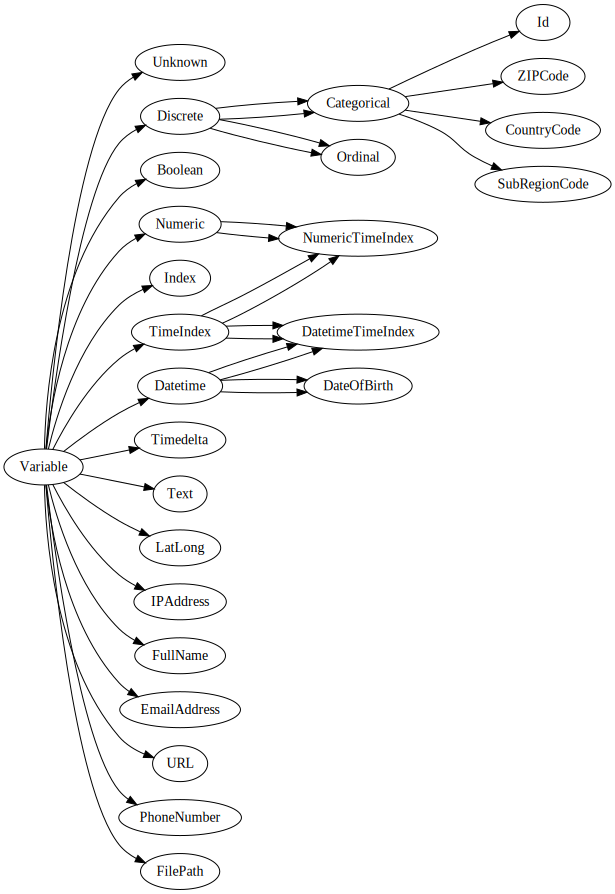

In [96]:
graph

In [61]:
seen = set()
while queue:
    node, depth = queue.pop()
    if depth == 0:
        graph.edge(Variable.__name__, node.__name__)

# for x in v_types:
#     parents = [y for y in inspect.getmro(x) if y not in [object, x]]
#     subclasses = x.__subclasses__()

# #     print('---')
# #     print(x.__name__)
# #     print('parents -> ', parents)
# #     print('subclasses -> ', subclasses)
# #     print('---')
#     # if len(subclasses) == 0:
#     #     graph.edge(Variable.__name__, x.__name__)
#     if parents == [Variable]:
#         # a direct child of Variable
#         adjacency_list[Variable.__name__].append(x.__name__)
#     # else:
#     #     # a descent of Variable, only plot the parent - child relation
#     #     graph.edge(parents[0].__name__, x.__name__)
# import json
# print(json.dumps(adjacency_list, indent=4))

<class 'featuretools.variable_types.variable.Boolean'>
[]
---
<class 'featuretools.variable_types.variable.Datetime'>
[<class 'featuretools.variable_types.variable.DatetimeTimeIndex'>, <class 'featuretools.variable_types.variable.DateOfBirth'>]
---
<class 'featuretools.variable_types.variable.Discrete'>
[<class 'featuretools.variable_types.variable.Categorical'>, <class 'featuretools.variable_types.variable.Ordinal'>]
---
<class 'featuretools.variable_types.variable.EmailAddress'>
[]
---
<class 'featuretools.variable_types.variable.FilePath'>
[]
---
<class 'featuretools.variable_types.variable.FullName'>
[]
---
<class 'featuretools.variable_types.variable.IPAddress'>
[]
---
<class 'featuretools.variable_types.variable.Index'>
[]
---
<class 'featuretools.variable_types.variable.LatLong'>
[]
---
<class 'featuretools.variable_types.variable.Numeric'>
[<class 'featuretools.variable_types.variable.NumericTimeIndex'>]
---
<class 'featuretools.variable_types.variable.PhoneNumber'>
[]
---
<cla

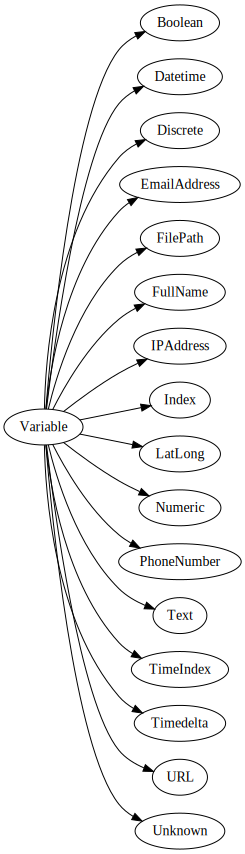

In [39]:
graph

In [18]:
Variable.__subclasses__()

[featuretools.variable_types.variable.Unknown,
 featuretools.variable_types.variable.Discrete,
 featuretools.variable_types.variable.Boolean,
 featuretools.variable_types.variable.Numeric,
 featuretools.variable_types.variable.Index,
 featuretools.variable_types.variable.Datetime,
 featuretools.variable_types.variable.TimeIndex,
 featuretools.variable_types.variable.Timedelta,
 featuretools.variable_types.variable.Text,
 featuretools.variable_types.variable.LatLong,
 featuretools.variable_types.variable.IPAddress,
 featuretools.variable_types.variable.FullName,
 featuretools.variable_types.variable.EmailAddress,
 featuretools.variable_types.variable.URL,
 featuretools.variable_types.variable.PhoneNumber,
 featuretools.variable_types.variable.FilePath]

In [16]:
from featuretools.variable_types.utils import graph_variable_types
graph_variable_types()

---
Boolean
parents ->  [<class 'featuretools.variable_types.variable.Variable'>]
subclasses ->  []
---
---
Categorical
parents ->  [<class 'featuretools.variable_types.variable.Discrete'>, <class 'featuretools.variable_types.variable.Variable'>]
subclasses ->  [<class 'featuretools.variable_types.variable.Id'>, <class 'featuretools.variable_types.variable.ZIPCode'>, <class 'featuretools.variable_types.variable.CountryCode'>, <class 'featuretools.variable_types.variable.SubRegionCode'>]
---
---
CountryCode
parents ->  [<class 'featuretools.variable_types.variable.Categorical'>, <class 'featuretools.variable_types.variable.Discrete'>, <class 'featuretools.variable_types.variable.Variable'>]
subclasses ->  []
---
---
DateOfBirth
parents ->  [<class 'featuretools.variable_types.variable.Datetime'>, <class 'featuretools.variable_types.variable.Variable'>]
subclasses ->  []
---
---
Datetime
parents ->  [<class 'featuretools.variable_types.variable.Variable'>]
subclasses ->  [<class 'feature

TypeError: 'module' object is not callable

As we can see, there are multiple variable types and some have subclassed variable types. For example, ZIPCode is variable type that is child of Categorical type which is a child of Discrete type. 

Let's explore some of the variable types and understand them in detail.

## Discrete

A Discrete variable type can only take certain values. It is a type of data that can be counted, but cannot be measured. If it can be classified into distinct buckets, then it a discrete variable type. 

There are 2 sub-variable types of Discrete. These are Categorical, and Ordinal. If the data has a certain ordering, it is of Ordinal type. If it cannot be ordered, then is a Categorical type. 

### Categorical 

A Categorical variable type can take unordered discrete values. It is usually a limited, and fixed number of possible values. Categorical variable types can be represented as strings, or integers. 

Some examples of Categorical variable types:

- Gender
- Eye Color
- Nationality
- Hair Color
- Spoken Language

### Ordinal

A Ordinal variable type can take ordered discrete values. Similar to Categorical, it is usually a limited, and fixed number of possible values. However, these discrete values have a certain order, and the ordering is important to understanding the values. Ordinal variable types can be represented as strings, or integers. 

Some examples of Ordinal variable types:

- Educational Background (Elementary, High School, Undergraduate, Graduate)

- Satisfaction Rating (“Not Satisfied”, “Satisfied", “Very Satisfied”)

- Spicy Level (Hot, Hotter, Hottest)

- Student Grade (A, B, C, D, F)

- Size (small, medium, large)


#### Categorical SubTypes (CountryCode, Id, SubRegionCode, ZIPCode)

There are also more distinctions within the Categorical variable type. These include CountryCode, Id, SubRegionCode, and ZIPCode.

It is important to make this distinction because there are certain operations that can be applied, but they don't necessary apply to all Categorical types. For example, there could be a [custom primitive](https://docs.featuretools.com/en/stable/automated_feature_engineering/primitives.html#defining-custom-primitives) that applies to the ZIPCode variable type. It could extract the first 5 digits of a ZIPCode. However, this operation is not valid for all Categorical variable types. Therefore it is approriate to use the ZIPCode variable type. 

## Datetime
A Datetime is a representation of a date and/or time. Datetime variable types can be represented as strings, or integers. However, they should be in a intrepretable format or properly cast before using DFS. 

Some examples of Datetime include:

- transaction time
- flight departure time
- pickup time

### DateOfBirth
A more distinct type of datetime is a DateOfBirth. This is an important distinction because it allows additional primitives to be applied to the data to generate new features. For example, having an DateOfBirth variable type, will allow the Age primitive to be applied during DFS, and lead to a new Numeric feature.

## Text
Text is a long-form string, that can be of any length. It is commonly used with NLP operations, such as TF-IDF. Featuretools supports NLP operations with the nlp-primitives [add-on](https://innovation.alteryx.com/natural-language-processing-featuretools/).

## LatLong
A LatLong represents an ordered pair (Latitude, Longitude) that tells the location on Earth. The order of the tuple is important. LatLongs can be represented as tuple of floating point numbers. 

To make a latlong in a dataframe do the following:

In [ ]:
import pandas as pd

data = pd.DataFrame()
data['latitude'] = [51.52, 9.93, 37.38]
data['longitude'] = [-0.17, 76.25, -122.08]
data['latlong'] = data[['latitude', 'longitude']].apply(tuple, axis=1)
data['latlong']

## List of Variable Types

We can also get all the variable types as a DataFrame.

In [ ]:
from featuretools.variable_types.utils import list_variable_types
list_variable_types()